In [1]:
# No Colab alterar o tipo de ambiente de execução para a versão 3.11 do python para funcionar o pycaret (atualmente o Colab utiliza a versão 3.12)
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/

# **Estação metereológica IAB**

*   **Nome:** Instituto Arruda Botelho (IAB)
*   **Tipo:** Meteorológica automática
*   **Data da instalação:**
*   **Local da instalação:** Fazenda São Jose - Itirapina/SP
*   **Bacia:** Bacia do Ribeirão do Lobo
*   **Latitude:** 22°11'5" S
*   **Longitude:** 47°51'11"O
*   **Altitude:** 790
*   **Cobertura do solo:** Pasto

## 1. Coleta de Dados

Esse dataset possui as leituras automáticas realizadas no período de **13/10/2011 à 10/03/2021**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo o conjunto de dados
df = pd.read_csv("dado_estacao_iab.csv", parse_dates=True, index_col=0)

# Criando variáveis de data, precipitação e temperatura
variavel_data = 'data_hora_da_leitura'
variavel_precipitacao = 'precipitacao'
variavel_temperatura = 'temperatura'

# Converte a coluna de datas para o tipo datetime
df[variavel_data] = pd.to_datetime(df[variavel_data], errors="coerce")

# Ordena por data
df = df.sort_values(variavel_data)

df

,data_hora_da_leitura,temperatura,umidade_relativa,pressao,precipitacao_maxima,segunda_data_hora_da_leitura,precipitacao,velocidade_do_vento,direcao_do_vento,irradiancia,...,cana_vic_3,umidade_solo_30_cm_cana,umidade_solo_60_cm_cana,umidade_solo_90_cm_cana,umidade_solo_20_cm_sf_solo_exposto,umidade_solo_20_cm_vic_solo_exposto,umidade_solo_20_cm_solo_exposto,diferenca_nivel_freatico_40_m,bateria,precipitacao_nao_corrigida
id,,,,,,,,,,,,,,,,,,,,,
336396,2011-10-13 14:10:00,26.39,59.27,921.0,NaN,NaN,0.0,4.810,9.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
336397,2011-10-13 14:20:00,26.24,60.76,921.0,NaN,NaN,0.0,2.690,0.46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
336398,2011-10-13 14:30:00,26.17,62.97,921.0,NaN,NaN,0.0,5.980,339.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
336399,2011-10-13 14:40:00,26.13,64.49,921.0,NaN,NaN,0.0,5.470,3.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
336400,2011-10-13 14:50:00,25.97,66.29,921.0,NaN,NaN,0.0,5.710,6.88,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788904,2021-03-10 12:20:00,26.81,46.63,922.0,NaN,NaN,0.0,2.146,328.30,NaN,...,NaN,NaN,-1.25,12.91,NaN,NaN,NaN,NaN,NaN,NaN
788905,2021-03-10 12:30:00,27.22,44.73,922.0,NaN,NaN,0.0,2.737,311.60,NaN,...,NaN,NaN,-1.25,12.92,NaN,NaN,NaN,NaN,NaN,NaN
788906,2021-03-10 12:40:00,27.01,46.33,922.0,NaN,NaN,0.0,2.530,317.80,NaN,...,NaN,NaN,-1.25,12.91,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Dicionário e estrutura do conjunto de dados

Nesse banco de dados existem **34 variáveis** sendo duas do tipo datetime e 35 numéricas, com **446011 leituras**, nas quais são:

* **id:** identificação da leitura
* **data_hora_da_leitura:** data e hora da leitura
* **temperatura:** temperatura do ar em graus celsius (C)
* **umidade_relativa:** umidade relativa em porcentagem (%)
* **pressao:** pressão média em milibar (mbar)
* **precipitacao_maxima:** precipitação em milímetros (mm)
* **segunda_data_hora_da_leitura:** data e hora da leitura
* **precipitacao:** precipitação em milímetros (mm)
* **velocidade_do_vento:** velocidade do vento em metros/segundo
* **direcao_do_vento:** direção do vento em graus
* **irradiancia:**
* **radiacao:**
* **etos:**
* **radiacao_com_ceu_limpo:**
* **pasto_sf_30:**
* **pasto_sf_60:**
* **pasto_sf_90:**
* **pasto_vic_2:**
* **pasto_vic_3:**
* **umidade_solo_30_cm_pastagem:**
* **umidade_solo_60_cm_pastagem:**
* **umidade_solo_90_cm_pastagem:**
* **cana_sf_1:**
* **cana_sf_2:**
* **cana_sf_3:**
* **cana_vic_1:**
* **cana_vic_2:**
* **cana_vic_3:**
* **umidade_solo_30_cm_cana:**
* **umidade_solo_60_cm_cana:**
* **umidade_solo_90_cm_cana:**
* **umidade_solo_20_cm_sf_solo_exposto:**
* **umidade_solo_20_cm_vic_solo_exposto:**
* **umidade_solo_20_cm_solo_exposto:**
* **diferenca_nivel_freatico_40_m:**
* **bateria:** Voltagem da bateria em volts (V)
* **precipitacao_nao_corrigida**

**Importante:** as leituras foram realizadas de 10 em 10 minutos.

## 3. Análise descritiva univariada das variáveis

In [18]:
# Dimensões do DataFrame
print(f'CONJUNTO DE DADOS \nVariáveis: \t{df.shape[1]} \Leituras: \t{df.shape[0]}\n')

CONJUNTO DE DADOS 
Variáveis: 	37 \Leituras: 	446011



In [19]:
# Tipos de cada variável
df.dtypes

,0
data_hora_da_leitura,datetime64[ns]
temperatura,float64
umidade_relativa,float64
pressao,float64
precipitacao_maxima,float64
segunda_data_hora_da_leitura,object
precipitacao,float64
velocidade_do_vento,float64
direcao_do_vento,float64
irradiancia,float64


In [20]:
# Dados ausentes
df.isnull().sum()

,0
data_hora_da_leitura,1
temperatura,2
umidade_relativa,30
pressao,2
precipitacao_maxima,312727
segunda_data_hora_da_leitura,312727
precipitacao,357
velocidade_do_vento,2
direcao_do_vento,13
irradiancia,312727


In [21]:
df.describe()

,data_hora_da_leitura,temperatura,umidade_relativa,pressao,precipitacao_maxima,precipitacao,velocidade_do_vento,direcao_do_vento,irradiancia,radiacao,...,cana_vic_3,umidade_solo_30_cm_cana,umidade_solo_60_cm_cana,umidade_solo_90_cm_cana,umidade_solo_20_cm_sf_solo_exposto,umidade_solo_20_cm_vic_solo_exposto,umidade_solo_20_cm_solo_exposto,diferenca_nivel_freatico_40_m,bateria,precipitacao_nao_corrigida
count,446010,446009.000000,445981.000000,446009.000000,133284.0,445654.000000,446009.000000,445998.000000,133284.0,445735.000000,...,440127.000000,414815.000000,415512.000000,415512.000000,361805.000000,145412.000000,145412.000000,413047.000000,412521.000000,318963.000000
mean,2016-05-11 03:23:17.427188224,20.865124,67.905140,926.286577,0.0,0.025633,2.057530,156.508162,0.0,0.215410,...,-119.094755,-90.039066,-11.234279,-10.872706,-6434.973348,-31.952839,-32.087916,-484.826786,-49.306536,0.017192
min,2011-10-13 14:10:00,-40.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.097000,0.0,0.000000,...,-1000.000000,-7999.000000,-1000.000000,-1000.000000,-7999.000000,-1000.000000,-1000.000000,-7999.000000,-1000.000000,0.000000
25%,2014-01-14 21:52:30,17.530000,52.120000,924.000000,0.0,0.000000,1.070000,86.300000,0.0,0.000000,...,0.482000,0.093000,0.074000,0.070000,-7999.000000,0.000000,0.000000,1.786000,12.100000,0.000000
50%,2016-06-04 11:15:00,20.430000,71.290000,926.000000,0.0,0.000000,1.910000,135.000000,0.0,0.000000,...,0.550000,0.135000,0.112000,0.104000,-7999.000000,0.000000,0.000000,2.604000,12.270000,0.000000
75%,2018-07-18 18:37:30,24.380000,87.200000,928.000000,0.0,0.000000,2.877000,223.200000,0.0,0.248436,...,0.596000,0.156000,0.130000,0.122000,-7999.000000,0.562000,0.132000,2.945000,12.640000,0.000000
max,2021-03-10 12:50:00,37.510000,99.000000,939.000000,0.0,57.400000,76.050000,972.000000,0.0,165.202000,...,498.500000,0.771000,0.706000,13.190000,0.814000,0.814000,0.486000,4.906000,998.000000,22.400000
std,NaN,4.996231,20.928002,5.662463,0.0,0.305188,1.295744,100.573904,0.0,1.918604,...,331.524184,844.578667,105.851272,105.908680,3172.568667,176.474198,176.449369,1913.706365,242.817072,0.211645


In [22]:
# Removendo variáveis desnecessárias
df.drop(['segunda_data_hora_da_leitura', 'irradiancia', 'precipitacao_nao_corrigida',
         'etos', 'radiacao_com_ceu_limpo', 'pasto_sf_30', 'pasto_sf_60',
         'pasto_sf_90', 'pasto_vic_1', 'pasto_vic_2', 'pasto_vic_3',
         'umidade_solo_30_cm_pastagem', 'umidade_solo_60_cm_pastagem', 'umidade_solo_90_cm_pastagem',
         'cana_sf_1', 'cana_sf_2', 'cana_sf_3', 'cana_vic_1', 'cana_vic_2', 'cana_vic_3',
         'umidade_solo_30_cm_cana', 'umidade_solo_60_cm_cana', 'umidade_solo_90_cm_cana',
         'umidade_solo_20_cm_sf_solo_exposto', 'umidade_solo_20_cm_vic_solo_exposto', 'umidade_solo_20_cm_solo_exposto',
         'diferenca_nivel_freatico_40_m', 'bateria', 'precipitacao_nao_corrigida'], axis=1, inplace=True)

In [23]:
# Agregação dos valores de 10 em 10 minutos para diário
df_10min = df.set_index(variavel_data).resample('10min').mean()

df_diario = df_10min.resample('D').agg({
    'temperatura': 'mean',
    'umidade_relativa': 'mean',
    'pressao': 'mean',
    'precipitacao_maxima': 'sum',
    'precipitacao': 'sum',
    'velocidade_do_vento': 'mean',
    'direcao_do_vento': 'mean',
    'radiacao': 'mean',
    'direcao_do_vento': 'mean'
})

In [24]:
# Define a precipitação como NaN se a temperatura também for NaN, ou seja, não houve leitura naquele dia
df_diario.loc[df_diario[variavel_temperatura].isna(), variavel_precipitacao] = np.nan

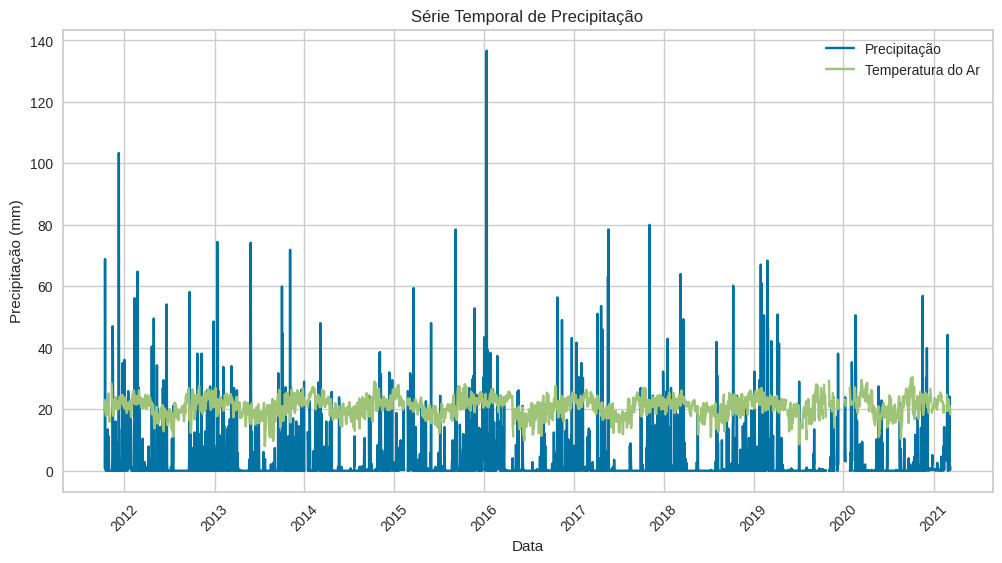

In [25]:
# Gráfico com leituras diárias de precipitação e temperatura
plt.figure(figsize=(12,6))
plt.plot(df_diario.index, df_diario[variavel_precipitacao], label="Precipitação")
plt.plot(df_diario.index, df_diario[variavel_temperatura], label="Temperatura do Ar")

# Adiciona título e rótulos
plt.title("Série Temporal de Precipitação")
plt.xlabel("Data")
plt.ylabel("Precipitação (mm)")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

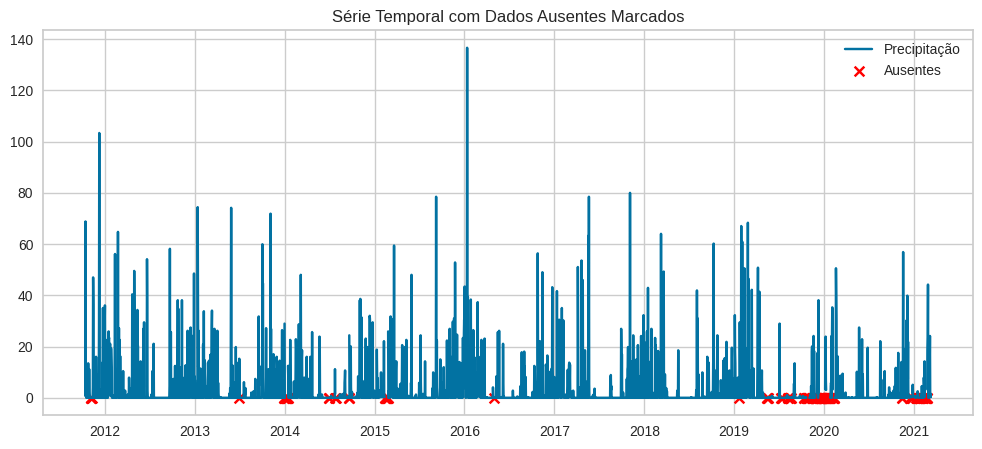

In [26]:
# Gráfico com leituras diárias de precipitação e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(df_diario.index, df_diario[variavel_precipitacao], label='Precipitação')
plt.scatter(df_diario.index[df_diario[variavel_precipitacao].isna()], [0]*df_diario[variavel_precipitacao].isna().sum(),
            color='red', label='Ausentes', marker='x')
plt.legend()
plt.title('Série Temporal com Dados Ausentes Marcados')
plt.show()



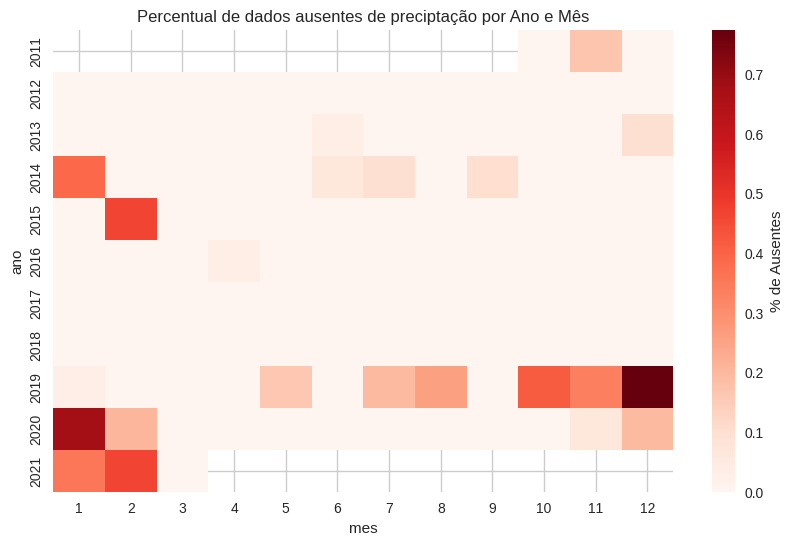

In [27]:
# Cria tabela ano x mês, contando valores ausentes
df_diario['ano'] = df_diario.index.year
df_diario['mes'] = df_diario.index.month
pivot = df_diario.pivot_table(values=variavel_precipitacao, index='ano', columns='mes',
                       aggfunc=lambda x: x.isna().mean())

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Reds', cbar_kws={'label': '% de Ausentes'})
plt.title('Percentual de dados ausentes de preciptação por Ano e Mês')
plt.show()


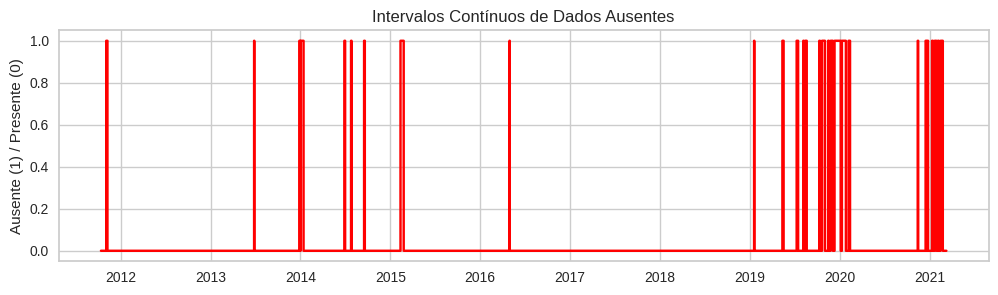

In [28]:
is_na = df_diario[variavel_precipitacao].isna()
plt.figure(figsize=(12,3))
plt.plot(df_diario.index, is_na, drawstyle='steps-mid', color='red')
plt.title('Intervalos Contínuos de Dados Ausentes')
plt.ylabel('Ausente (1) / Presente (0)')
plt.show()


In [29]:
# Agregando a precipitação diária para a soma Mensal ('MS' - Month Start)
# A função 'sum()' é usada para somar a precipitação dentro de cada mês
df_mensal = df_diario[variavel_precipitacao].resample('MS').sum().to_frame()

df_mensal

,precipitacao
data_hora_da_leitura,
2011-10-01,112.776
2011-11-01,129.540
2011-12-01,256.540
2012-01-01,294.640
2012-02-01,214.376
...,...
2020-11-01,114.298
2020-12-01,131.826
2021-01-01,11.684


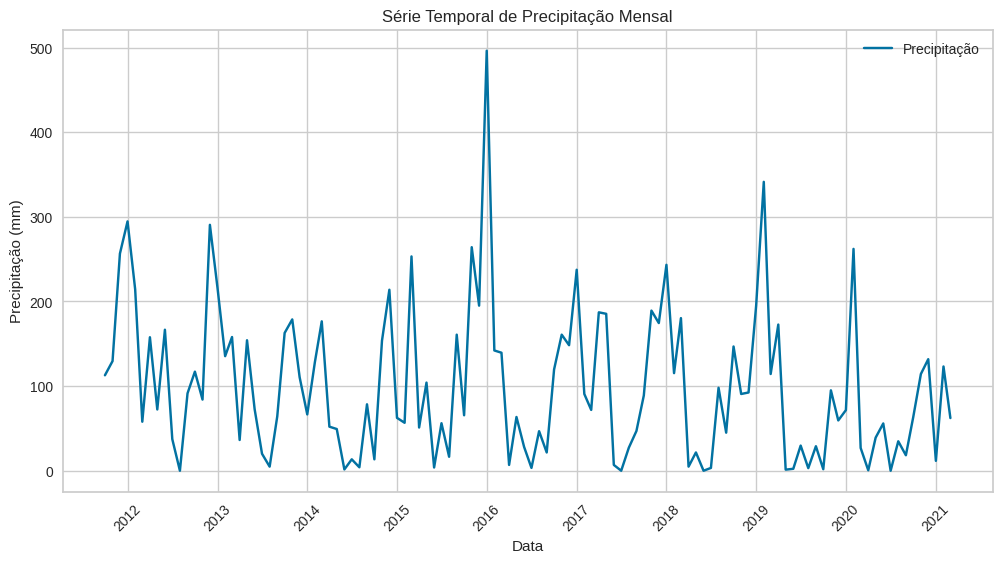

In [30]:
# Cria o gráfico de precipitação mensal
plt.figure(figsize=(12,6))
plt.plot(df_mensal.index, df_mensal[variavel_precipitacao], label="Precipitação")

# Adiciona título e rótulos
plt.title("Série Temporal de Precipitação Mensal")
plt.xlabel("Data")
plt.ylabel("Precipitação (mm)")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

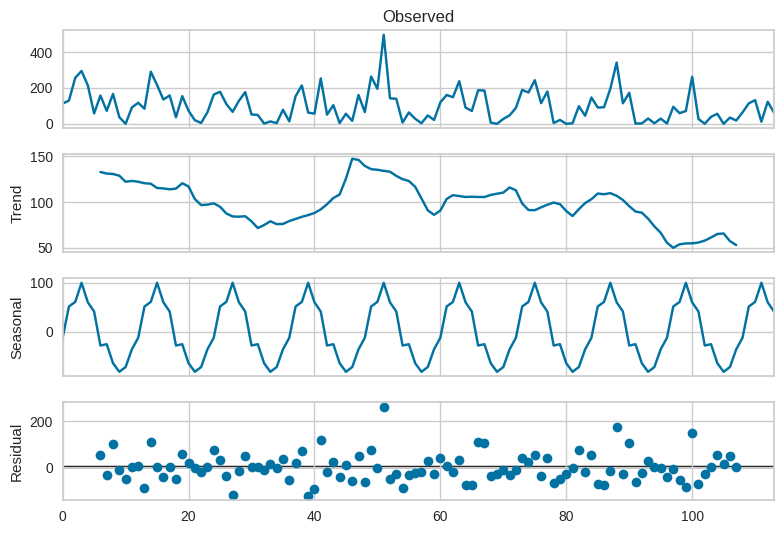

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

precipitacao_total = np.array(df_mensal[variavel_precipitacao])

result = seasonal_decompose(precipitacao_total, model='additive', period=12)
result.plot()

plt.show()

## 3. Previsão Futura para 1 ano

In [34]:
from pycaret.time_series import setup, compare_models, finalize_model, predict_model

# --- Configuração do PyCaret ---
# Inicializando o ambiente com os dados Mensais
# fh=12: Horizon of the forecast (12 meses, equivalente a um ano)
print("\nIniciando a Configuração do PyCaret (Dados Mensais)...")
s_mensal = setup(
    data = df_mensal,
    target = variavel_precipitacao,
    fh = 12,
    session_id = 456,
    #ignore_prep_pipeline = True,
    #verbose = False
)

# --- Comparação e Seleção do Melhor Modelo (Mensal) ---
print("Comparando Modelos (Mensal)...")
# Usando 'seasonal_decompose' para tentar melhorar a decomposição sazonal
best_model_mensal = compare_models(
    fold = 3,
    round = 4, # Maior precisão na comparação
    #verbose = False
)

print(f"\n--- O Melhor Modelo Selecionado pelo PyCaret (Mensal) é: {type(best_model_mensal).__name__} ---")

# --- Treinamento e Finalização do Melhor Modelo ---
final_model_mensal = finalize_model(best_model_mensal)

# --- Previsão Futura (Forecast) ---
# Gerando a previsão para 12 meses
predictions_mensal = predict_model(final_model_mensal)




Iniciando a Configuração do PyCaret (Dados Mensais)...


,Description,Value
0,session_id,456
1,Target,precipitacao
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(114, 1)"
5,Transformed data shape,"(114, 1)"
6,Transformed train set shape,"(102, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Comparando Modelos (Mensal)...


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.9200,0.7990,62.3591,77.7602,6453294409501951.0000,0.9540,0.1078,0.1233
ets,ETS,0.9215,0.7990,62.4643,77.7527,6504273343887384.0000,0.9557,0.1078,0.2200
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.9348,0.8623,63.4931,83.9208,2979416231793764.5000,1.0476,-0.0391,0.4167
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.9400,0.8682,63.7942,84.5452,3853503209461797.0000,0.9833,-0.0689,0.4200
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.9436,0.8386,64.0455,81.6395,4360774259482410.0000,0.9609,0.0382,0.9133
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.9449,0.8363,64.0754,81.3927,5361105219389748.0000,0.9713,0.0115,0.4167
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.9468,0.8323,64.1989,81.0000,5635556923497876.0000,0.9794,0.0302,0.6900
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.9530,0.8654,64.6983,84.2661,4949467124781290.0000,0.9670,-0.0510,0.7900
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.9632,0.8562,65.3263,83.3268,4881368674202073.0000,1.0044,-0.0464,0.3967
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.9632,0.8561,65.3239,83.3231,4882073535938733.0000,1.0044,-0.0464,0.4167


Processing:   0%|          | 0/117 [00:00<?, ?it/s]


--- O Melhor Modelo Selecionado pelo PyCaret (Mensal) é: ExponentialSmoothing ---


In [39]:
predictions_mensal

,y_pred
2021-04,41.9781
2021-05,44.3795
2021-06,5.1530
2021-07,-14.2402
2021-08,-6.2601
2021-09,29.3662
2021-10,53.6065
2021-11,110.3963
2021-12,131.6904
2022-01,153.9112


ConversionError: Failed to convert value(s) to axis units: array([Period('2021-04', 'M'), Period('2021-05', 'M'),
       Period('2021-06', 'M'), Period('2021-07', 'M'),
       Period('2021-08', 'M'), Period('2021-09', 'M'),
       Period('2021-10', 'M'), Period('2021-11', 'M'),
       Period('2021-12', 'M'), Period('2022-01', 'M'),
       Period('2022-02', 'M'), Period('2022-03', 'M')], dtype=object)

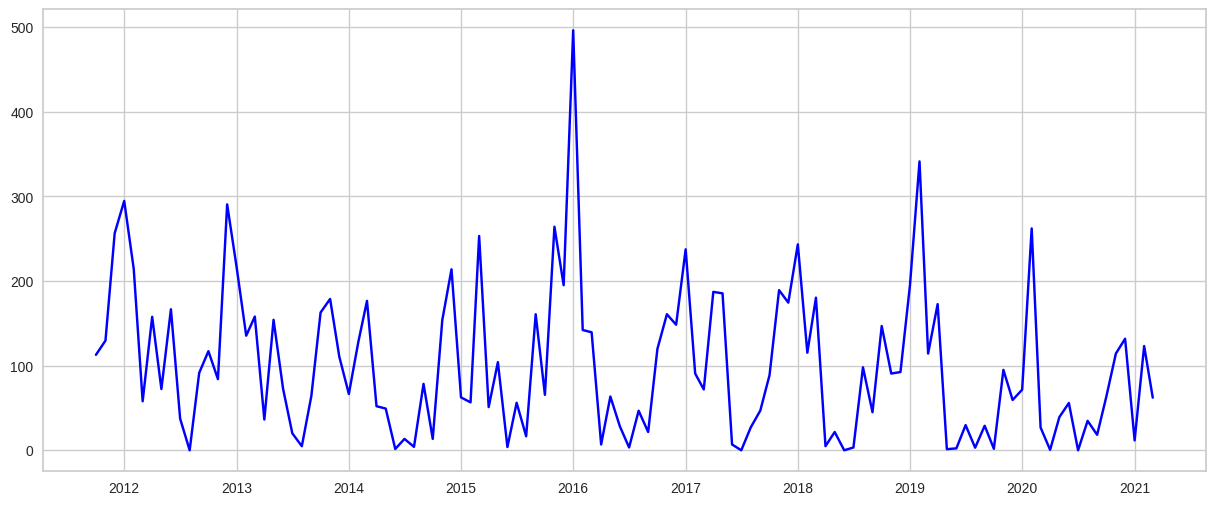

In [40]:
# --- Visualização ---
# Gerando o gráfico de previsão Mensal
plt.figure(figsize=(15, 6))

# Série histórica (Dados Reais Mensais)
plt.plot(df_mensal.index, df_mensal[variavel_precipitacao], label='Série Histórica (Precipitação Mensal)', color='blue')

# Previsão futura Mensal
plt.plot(predictions_mensal.index, predictions_mensal['y_pred'], label='Previsão Futura (12 Meses)', color='red', linestyle='--')

# Configurações do Gráfico
plt.title(f'Previsão de Precipitação Mensal Agregada - Modelo: {type(best_model_mensal).__name__}')
plt.xlabel('Data')
plt.ylabel('Precipitação Total Mensal')
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

# Exibindo os primeiros valores da previsão
print("\nValores da previsão (12 meses):")
print(predictions_mensal)